#Prueba de algotirmo No supervisado

Se explora si el aprendizaje no supervisado nos puede sar información de utilidad. Para esto se prueba agrupar datos de la ubicación del servicio MiBici en el área metropolitana de Jalisco. Para esto se extrae información de la API del proyecto global Citybik.

In [1]:
## Imports necesarios
import numpy as np
import requests
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [2]:
endpoint = 'https://api.citybik.es/v2/networks/mibici-guadalajara'
r = requests.get(endpoint)
r.status_code

200

In [3]:
json = r.json()
Info_MIBICI =  pd.json_normalize(json)
Info_MIBICI

,network.company,network.gbfs_href,network.href,network.id,network.location.city,network.location.country,network.location.latitude,network.location.longitude,network.name,network.stations
0,"[BKT bici publica S.A. de C.V., PBSC Urban Sol...",https://guad.publicbikesystem.net/ube/gbfs/v1/,/v2/networks/mibici-guadalajara,mibici-guadalajara,Guadalajara,MX,20.673788,-103.370433,MIBICI,"[{'empty_slots': 8, 'extra': {'address': '(GDL..."


Obtenemos un dataframe sólo con los datos de Latitud y Longitud para cada estación MiBici.

In [4]:
#definimos listas
latitudes = []
longitudes = []

for i in range(0,299): # va a tomar información de las 299 estaciones registradas 
  latitudes.append(Info_MIBICI["network.stations"][0][i]['latitude'])
  longitudes.append(Info_MIBICI["network.stations"][0][i]['longitude'])

Cada lista de puede convertir a una serie de Pandas de la siguiente forma:

In [5]:
latitudes_serie = pd.Series(latitudes)
longitudes_serie = pd.Series(longitudes)

Buscamos crear un DataFrame con estas series, para esto primero hay que definir un diccionario.

In [6]:
diccionario_coordenadas = { "Latitud": latitudes_serie, "Longitud": longitudes_serie}

Obtenemos nuestro DataFrame con los datos de coordenadas para cada estación de bicicletas. 

In [7]:
df_coordenadas = pd.DataFrame(diccionario_coordenadas)

In [8]:
#Exploramos el dataframe
df_coordenadas.shape[0]

299

In [9]:
df_coordenadas.head()

,Latitud,Longitud
0,20.666288,-103.398899
1,20.676470,-103.376060
2,20.684560,-103.356990
3,20.674087,-103.356320
4,20.679296,-103.370658


In [10]:
df_coordenadas.tail()

,Latitud,Longitud
294,20.681852,-103.357338
295,20.670468,-103.366071
296,20.681081,-103.360099
297,20.737087,-103.401285
298,20.682067,-103.362923


Definimos una función para aplicar el método K-means

In [20]:
def all_in_one_k_means(datos, k):
  x_train, x_test, y_train, y_test = train_test_split(datos,datos,test_size=0.4) #Divide los datos en 40% entrenamiento
  
  #Usamos los datos de entrenamiento
  modelo_kmeans = KMeans(n_clusters = k).fit(x_train)
  #Extraemos los centroides.
  centroides = modelo_kmeans.cluster_centers_
  #Obtenemos las etiquetas de centroide a la que pertenece cada dato
  label = modelo_kmeans.fit_predict(datos)
  #conseguimos los tipos de eqtiquetas totales
  unique_labels = np.unique(label)
  #Graficamos cada dato identificado por el clúster al que pertenece
    #plotting the results:
 
  for i in unique_labels: #Graficamos cada punto de acuerdo al cluster al que pertenece
   filtered_label= df_coordenadas[label == i]
   plt.scatter(filtered_label["Latitud"][:] , filtered_label["Longitud"][:])
  plt.scatter(centroides[:,0] , centroides[:,1] , s = 80, color = 'black') #Graficar centroides
  plt.legend(unique_labels) #A cada centroide se le asigna un número
  plt.title("Zonas de estaciones MiBiCi en el área metropolitana de Guadalajara")
  plt.xlabel("Latitud")
  plt.ylabel("Longitud")
  plt.show()
  


Probamos los datos con 3, 4, 5 y 6 clusters

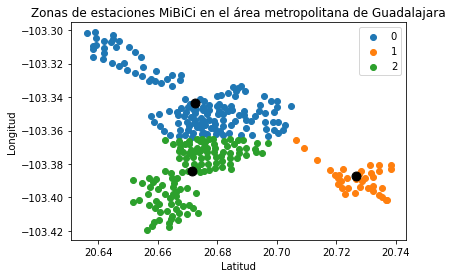

In [21]:
#3 clusters
all_in_one_k_means(df_coordenadas, 3)

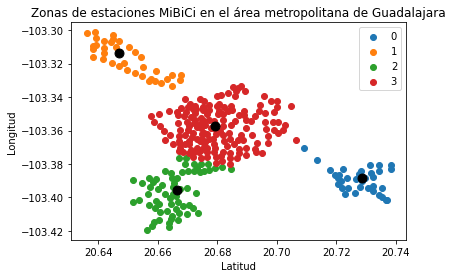

In [22]:
#4 clusters
all_in_one_k_means(df_coordenadas, 4)

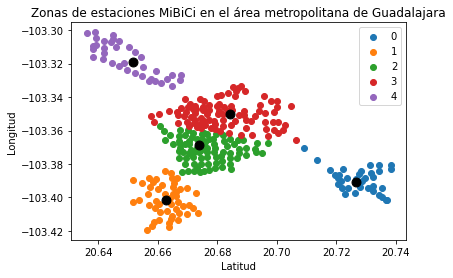

In [23]:
#5 clusters
all_in_one_k_means(df_coordenadas, 5)

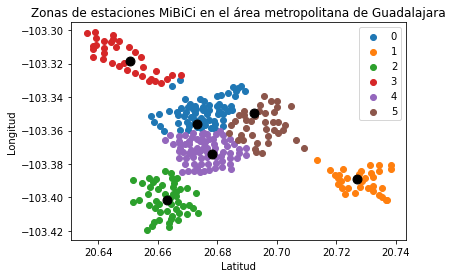

In [24]:
#6 clusters
all_in_one_k_means(df_coordenadas, 6)

#Conclusión
El aprendizaje no supervizado nos puede ayudar a separar las regiones en donde se encuentran las las estaciones MIBici en Jalisco. Los lugares de mayor concentración pueden ser áreas de oportunidad para vender todo tipo de accesorios para bibicleta, o se podría tratar de cubrir zonas que no cuenten con servicio de bicicleta. Se ha divido la distribución en 4 a 6 zonas que se distribuyen en 3 municipios del estado de Jalisco. La decisión debe ir acompañada del perfil de la población que podría estar interesada en comprar bicicletas. 